# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict 💰

## Get data

We're going to be using the historical price of Bitcoin to try and predict the future price of Bitcoin

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

## Import time series data with Pandas

In [1]:
# Import pandas
import pandas as pd

# Let's read in the data
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas column 1 is a date time

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [2]:
# Last samples from the data set
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [3]:
# Grab info from the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples. 

Typically, deep learning models like lots of samples. 1,000 - 10,000 - 1,000,000

A smaller number of samples is something you'll often run into with time series data problems

In [4]:
# How many samples
len(df) # 365 * 8

2787

In [5]:
# Only having the closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


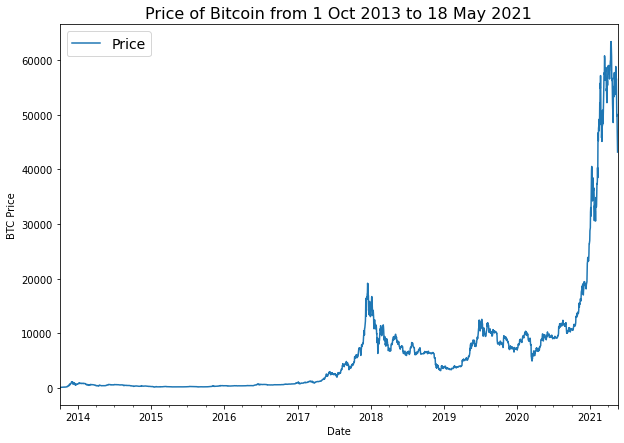

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021",fontsize=16);
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module

In [7]:
# Importing and formatting 
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
    csv_reader = csv.reader(f,delimiter=",")
    next(csv_reader) # skip first line (gets ride of column titles)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1],"%Y-%m-%d")) # Get the dates as dates (not strings)
        btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]        

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

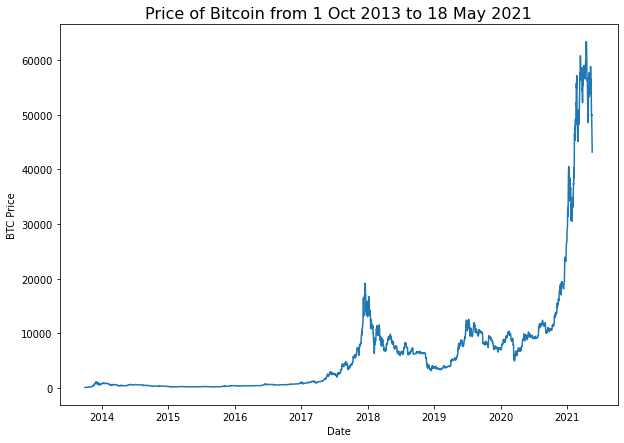

In [8]:
# Plot from csv
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021",fontsize=16);

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
# Wrong way to make train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

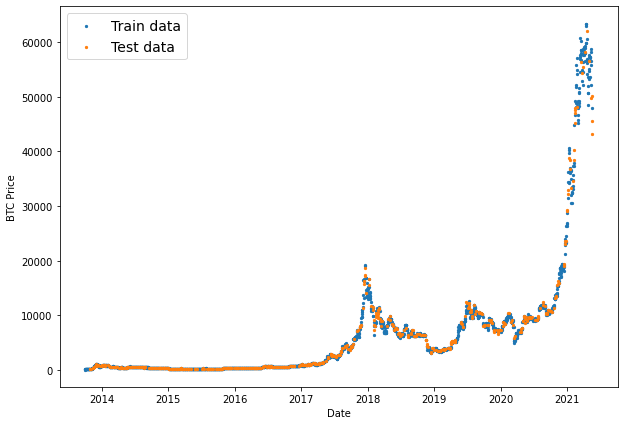

In [11]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14);
plt.show();

### Create train & test sets for time series (the right way)

In [12]:
# Create train and test splits the right way for time series data
split_size = int(0.8*len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

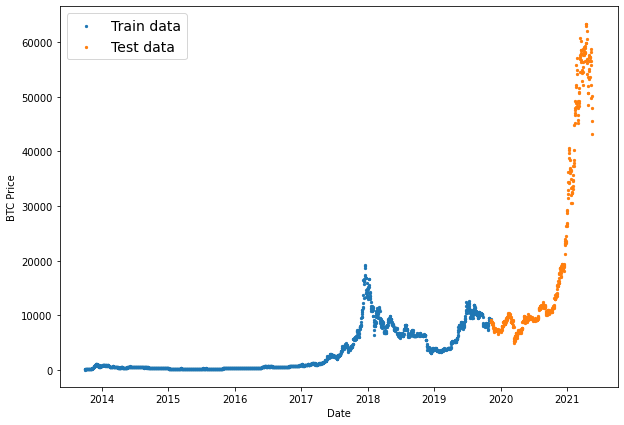

In [13]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14);
plt.show();

## Create a plotting function

Typing plotting code is tedious, let's functionize it.

In [14]:
# Create a function to plot time series data
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
    """
    Plots timesteps against values.

    Parameters
    ----------
    timesteps: array of timestep values
    values: array of values
    format: style of plot, default "."
    start: where to start the plot (index)
    end: where to end the plot (index)
    label: label to show on plot

    """
    # Plot the series
    plt.plot(timesteps[start:end],values[start:end],format,label=label)
    plt.xlabel("Time (s)")
    plt.ylabel("BTC Price")

    if label:
        plt.legend(fontsize=14)
        
    plt.grid(True)

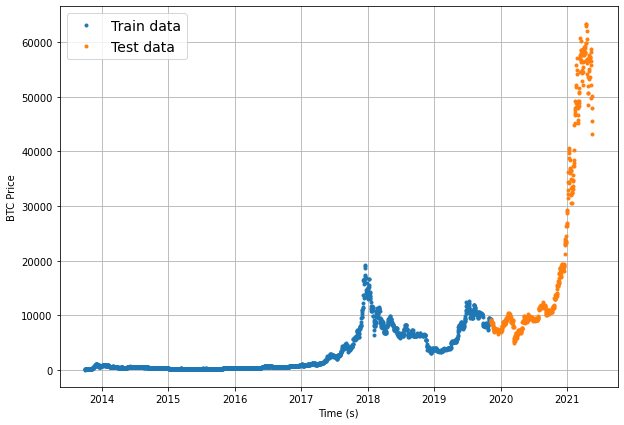

In [15]:
# Testing out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")

## Modelling Experiements

We've got Bitcoin data, let's run a series of modelling experiments.

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict horizon

Modelling experiments --- (Horizon size, Window size, Extra data):
* 0. Naive model (baseline) --- **(NA, NA, NA)**
* 1. Dense model --- **(1, 7, NA)**
* 1. Same as 1 --- **(1, 30, NA)**
* 2. Same as 1 --- **(7, 30, NA)**
* 4. Conv 1D --- **(1, 7, NA)**
* 5. LSTM --- **(1, 7, NA)**
* 6. Same as 1 (but with multivariate data) --- **(1, 7, Block reward size)**
* 7. N-BEATs Algorithm --- **(1, 7, NA)**
* 8. Ensemble (multiple models optimized on different loss functions) --- **(1, 7, NA)**
* 9. Future prediction model (model to predict future values) --- **(1, 7, NA)**
* 10. Same as 1 (but with turkey data introduced) --- **(1, 7, NA)**

> 🔑📚 : [Reference for Time Series Forecasting](https://otexts.com/fpp3/)

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y_hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [16]:
# Create a naive forcecast
naive_forecast = y_test[:-1]
naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

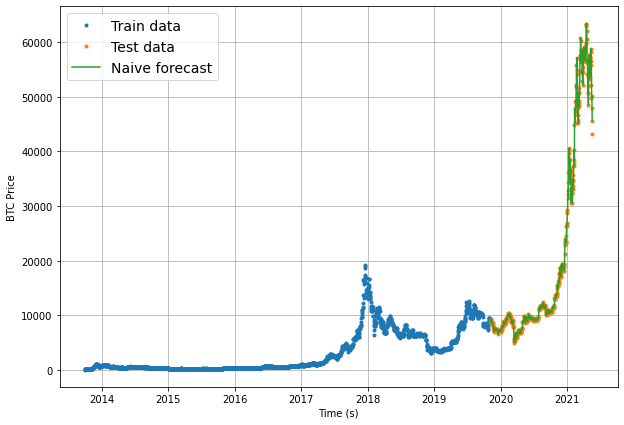

In [17]:
# Plot naive forecast
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', label="Naive forecast") # everything after first index

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting ...

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics. 

A few common metrics (**the lower the better**):
* MAE - mean absolute error
* MSE - mean squared error

The main thing we are evaluating is: how do our model's forecasts (y_pred) compare against the actual values

In [18]:
import tensorflow as tf

In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality).
    """
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))

    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

    return mae / mae_naive_no_season

🔑: **Note**: For mean absolute scaled error (MASE), a scaled error is **> 1 if the forecast is worse than the naive** and **< 1 if the forecast is better than naive**.

In [20]:
# Test MASE (this vaue should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [60]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return  {"mae": float(mae.numpy()),
          "mse": float(mse.numpy()),
          "rmse": float(rmse.numpy()),
          "mape": float(mape.numpy()),
          "mase": float(mase.numpy())}

In [61]:
# Let's compute the evaluation metrics using our function
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results              

{'mae': 567.980224609375,
 'mse': 1147547.0,
 'rmse': 1071.2362060546875,
 'mape': 2.5165250301361084,
 'mase': 0.9995700120925903}

Save model results

In [62]:
# Saving model results
from Functions.helper_functions import save_model_results_json

des_path = r"Saved Results\10_time_series_forecasting_with_tensorflow"

save_model_results_json(filepath=des_path,
                        var_to_save=naive_results,
                        file_string="model_0_results")

Success! File written to destination.


In [30]:
# What does the dataset look like?
tf.reduce_mean(y_test), tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

In [48]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


## Format Data Part 2: Windowing our dataset

Why do we window? 

We window our time series dataset to turn our data into a supervised learning problem.

In [49]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [50]:
# Let's setup global variables for window and horizon
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make prediction

In [51]:
# Create function to label window data
def get_labeled_windows(x, horizon=HORIZON):
    """
    Creates labels for windowed dataset.

    e.g. if horizon = 1
    Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])

    """
    return x[:,:-horizon], x[:,-horizon:]

In [52]:
# Test out the window labelling function
test_window, test_label = get_labeled_windows(tf.expand_dims(tf.range(8),axis = 0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data. However, this only works on a small scale. We need a way to do the above across our entire time series.

Our function will:
1. Create a window step of specific window size
2. Use NumPy indexing to create a 2D array of multiple window steps
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labeled_windows()` function we created above to turn the window steps into windows with a specified horizon

In [54]:
# Import numpy
import numpy as np

In [55]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    Turns a 1D array into a 2D array of sequential labelled windows of window size with horizon size labels
    """

    # 1. Create a window of specific window size (add the horizon on the end for labelling)
    window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)

    # 2. Create a 2D array of multiple window steps
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-window_size+horizon-1),axis=0).T

    # 3. Index on the target array (a time series)
    windowed_array = x[window_indexes]

    # 4. Get the labelled window
    window, labels = get_labeled_windows(windowed_array, horizon=horizon)

    return window, labels

In [56]:
# Generate full windows and labels
full_windows, full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [57]:
# View the first 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i]}-> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]-> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ]-> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ]-> Label: [125.96116]


In [58]:
# View the last 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i-3]}-> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676]-> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472]-> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361]-> Label: [43144.47129086]


> 🔑 **Note**: There is a function that does similar to the one above [`tf.keras.utils.timeseries_dataset_from_array()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array)